In [1]:
import numpy as np

Importamos a biblioteca numpy e a chamamos de np.

In [2]:
def latLog_NomeCidade(path_arquivo):
    #Trata a linha da longitude e da latitude
    arquivo = open(path_arquivo)
    linha = arquivo.readlines()[4:5]
    texto = ''.join(linha)
    lat_long = texto.split()[1:5]
    lat_long = ''.join(lat_long)
    
    #Trata a linha do nome da cidade mais próxima
    arquivo = open(path_arquivo)
    linha = arquivo.readlines()[35:36]
    texto = ''.join(linha)
    texto = texto.split(',')[0]
    cidade = texto.split(':')[1][+1:]
    
    #Retorna a Longitude e Latitude mais o nome da cidade mais próxima
    return(lat_long,cidade)

Criamos uma função que recebe o nome do arquivo de dado como argumento e retorna a latitude e longitude da estação e o nome da primeira cidade mais próxima da estação de medida.

In [3]:
latLog_NomeCidade("./dados/0.80S-49.02W-TAVG-Trend.txt")

('0.80S,49.02W', 'BelÃ©m')

Fizemos um teste com a função

In [4]:
def temp_anual_est(path_arquivo):
    #Trata da linha da temperatura absoluta estimada
    arquivo = open(path_arquivo)
    linha = arquivo.readlines()[47:48]
    texto = ''.join(linha)
    temp_absol_estim = texto.split()[8]
    temp_absol_estim = float(temp_absol_estim)
    
    #Trata de toda a coluna com as anomalias de temperatura anual
    dados = np.loadtxt(path_arquivo, comments="%")
    anomalia_temperatura_anual = np.nan_to_num(dados[:,4])

    return anomalia_temperatura_anual + temp_absol_estim

Criamos uma função que recebe o nome do arquivo de dado como argumento e retorna um numpy array da temperatura anual estimada, que é a soma da temperatura absoluta estimada com a anomalia anual.

In [5]:
temp_anual_est("./dados/0.80S-49.02W-TAVG-Trend.txt")

array([ 26.74 ,  26.74 ,  25.868, ...,  26.74 ,  26.74 ,  26.74 ])

Testamos a função

In [6]:
import glob as gb
import matplotlib.pyplot as plt
%matplotlib inline

Importamos a biblioteca matplotlib.pyplot e a chamamos de plt.</p>
Também importamos a biblioteca glob e a chamamos de gb.

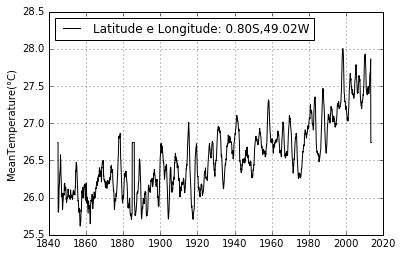

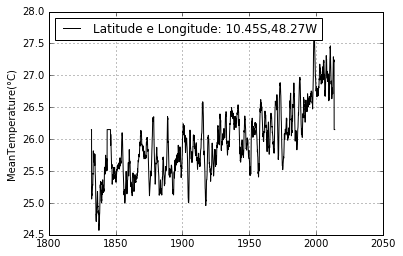

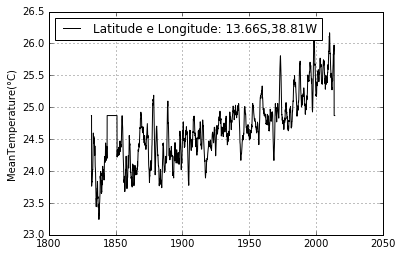

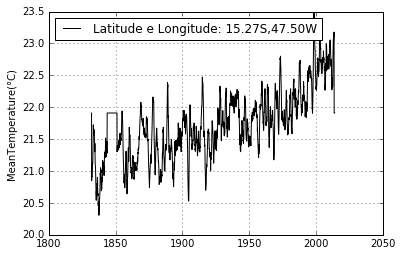

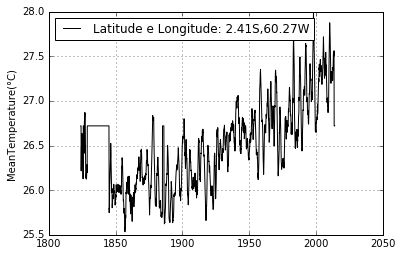

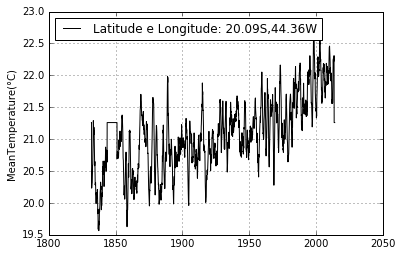

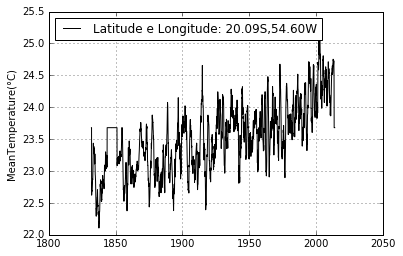

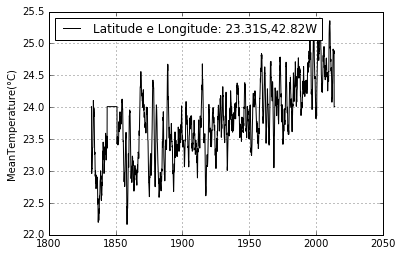

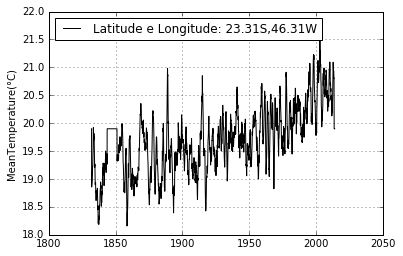

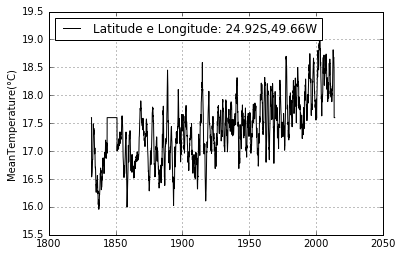

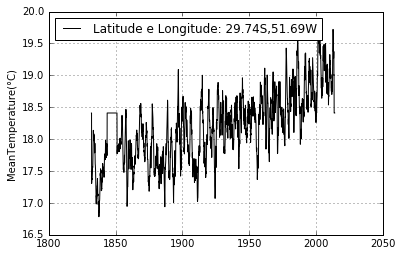

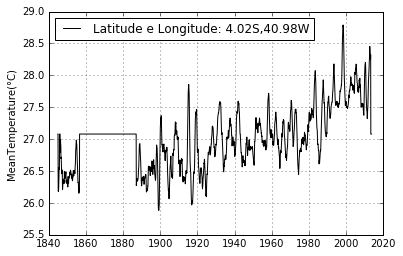

In [7]:
#Substituir \\ por /
arquivos = gb.glob("dados\\*.txt")
for arquivo in arquivos:
    if arquivo != 'dados\\brazil-TAVG-Trend.txt':
        
        anomalia_temperatura_anual = temp_anual_est(arquivo)
        latitude_longitude = latLog_NomeCidade(arquivo)[0]
        nome_cidade = latLog_NomeCidade(arquivo)[1]
        
        matriz = np.loadtxt(arquivo,comments='%')
        anos = matriz[:,0]
        meses = matriz[:,1]
        anos_decimais = anos + (meses - 1) /12
        
        plt.ylabel("MeanTemperature(°C)")
        plt.plot(anos_decimais,anomalia_temperatura_anual,color='black',label="Latitude e Longitude: " + latitude_longitude)
        plt.legend(loc='upper left')
        plt.grid(True)
        plt.show()
        
        arquivo_png = nome_cidade.replace(' ','_') + ".png"
        plt.savefig(arquivo_png)

Criamos gráficos da temperatura anual estimada para cada estação da pasta dados referente a uma cidade(excluimos o arquivo brazil-TAVG-Trend.txt), sendo o título de cada gráfico a latitude e longitude da respectiva cidade.</p>
Os gráficos posteriormente são salvos com o nome da cidade e em formato png.</p>
Quando o nome é composto, substituimos os espaços por '_'.